In [35]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [36]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature_data.csv")
pf = data.copy()

In [37]:
pf.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [38]:
unique_dates = pf['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = pf['Date'] == date  
    test_data = pf[date_wise]
    
    confirmed_cases.append(test_data['Cumulative_cases'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Cumulative_cases' : confirmed_cases}
df = pd.DataFrame(df)

In [39]:
df.head()

,Date,Cumulative_cases
0,22-01-2020,554
1,23-01-2020,653
2,24-01-2020,939
3,25-01-2020,1432
4,26-01-2020,2113


In [40]:
df=df.rename(columns={'Date':'ds', 'Cumulative_cases':'y'})

In [41]:
df.head()

,ds,y
0,22-01-2020,554
1,23-01-2020,653
2,24-01-2020,939
3,25-01-2020,1432
4,26-01-2020,2113


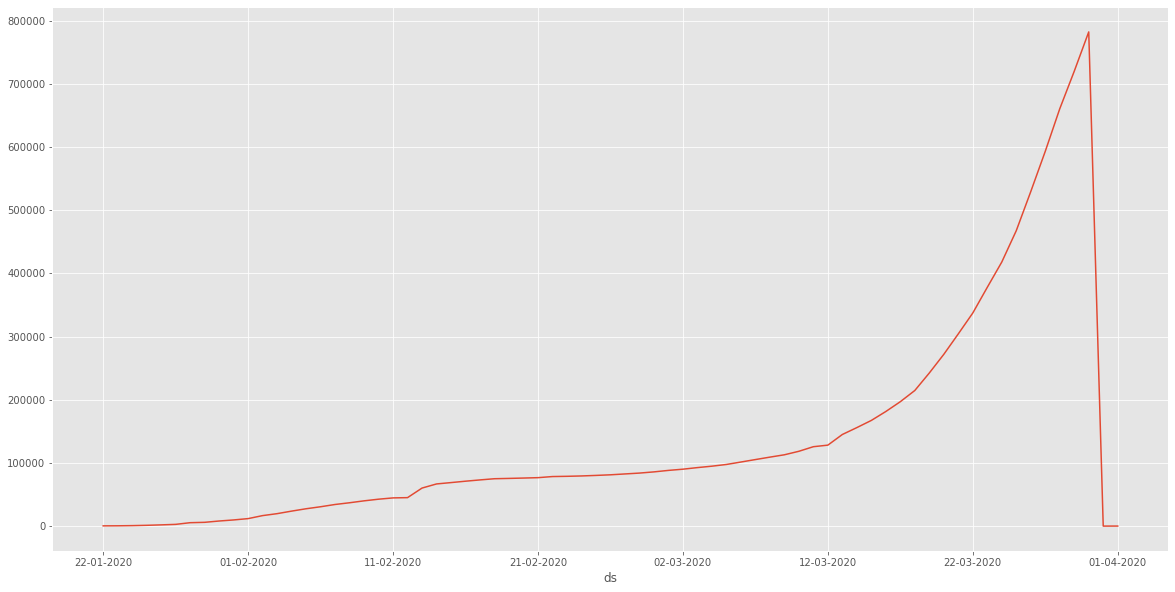

In [42]:
df.set_index('ds').y.plot()

In [43]:
df['y'] = np.log(df['y'])


In [44]:
df.tail()

,ds,y
66,28-03-2020,13.400493
67,29-03-2020,13.486623
68,30-03-2020,13.569555
69,31-03-2020,5.278115
70,01-04-2020,5.476464


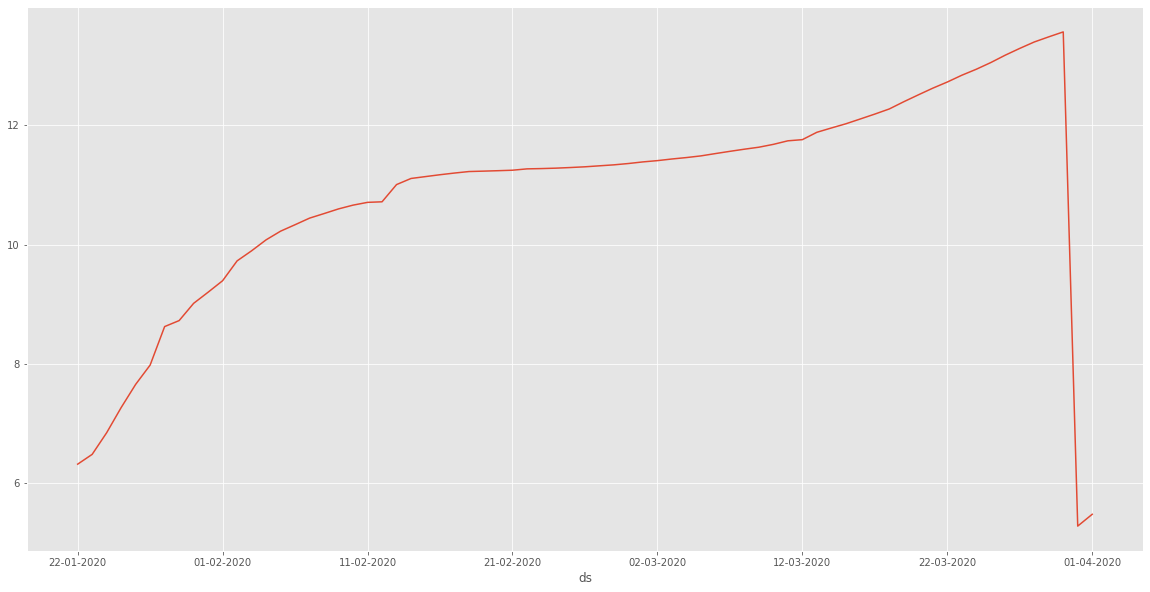

In [45]:
df.set_index('ds').y.plot()

In [46]:
model = Prophet()
model.fit(df);


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
weekly_seasonality=True

In [48]:
future = model.make_future_dataframe(periods=30, freq = 'd')
future.tail()

,ds
96,2020-12-29
97,2020-12-30
98,2020-12-31
99,2021-01-01
100,2021-01-02


In [49]:

forecast = model.predict(future)

In [50]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
96,2020-12-29,12.420820,9.938799,14.380597,12.420657,12.421005,-0.314885,-0.314885,-0.314885,-0.314885,-0.314885,-0.314885,0.0,0.0,0.0,12.105935
97,2020-12-30,12.426673,9.894696,14.400322,12.426500,12.426867,-0.334428,-0.334428,-0.334428,-0.334428,-0.334428,-0.334428,0.0,0.0,0.0,12.092246
98,2020-12-31,12.432526,9.888950,14.480044,12.432343,12.432737,-0.224346,-0.224346,-0.224346,-0.224346,-0.224346,-0.224346,0.0,0.0,0.0,12.208181
99,2021-01-01,12.438379,10.366061,14.962113,12.438183,12.438603,0.265002,0.265002,0.265002,0.265002,0.265002,0.265002,0.0,0.0,0.0,12.703381
100,2021-01-02,12.444232,9.967728,14.392793,12.444023,12.444466,-0.131227,-0.131227,-0.131227,-0.131227,-0.131227,-0.131227,0.0,0.0,0.0,12.313005


In [51]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-12-29,12.105935,9.938799,14.380597
97,2020-12-30,12.092246,9.894696,14.400322
98,2020-12-31,12.208181,9.888950,14.480044
99,2021-01-01,12.703381,10.366061,14.962113
100,2021-01-02,12.313005,9.967728,14.392793


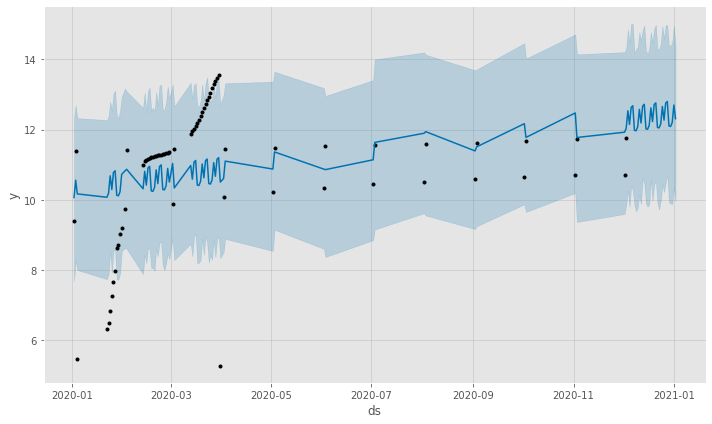

In [52]:
model.plot(forecast);